# Premier League Dataset Analysis
This notebook answers the 10 questions based on the Premier League dataset.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "premier-player-23-24 - premier-player-23-24.csv.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27,34,34,2931,32.6,8,9,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23,35,33,2857,31.7,19,8,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29,33,33,2785,30.9,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23,36,31,2647,29.4,11,8,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33,32,30,2767,30.7,0,4,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


## Q1. Top 10 players with the highest total goals (Gls) scored

In [3]:

top_goals = df.nlargest(10, 'Gls')[['Player', 'Gls']]
top_goals


,Player,Gls
6,Erling Haaland,27
83,Cole Palmer,22
117,Alexander Isak,21
1,Phil Foden,19
204,Ollie Watkins,19
369,Dominic Solanke,19
28,Mohamed Salah,18
146,Son Heung-min,17
59,Bukayo Saka,16
237,Jarrod Bowen,16


## Q2. Which team has the highest cumulative expected goals (xG)?

In [4]:

team_xg = df.groupby('Team')['xG'].sum().sort_values(ascending=False)
team_xg.head(1)


Team
Liverpool    90.3
Name: xG, dtype: float64

## Q3. Correlation between player’s age and goal contributions (G+A)

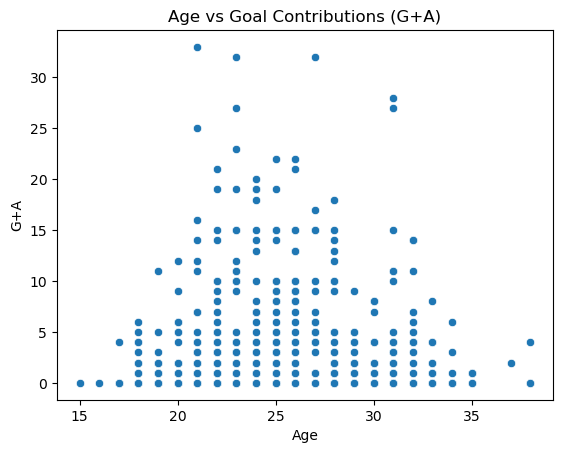

np.float64(0.05040065392615397)

In [3]:

df['G+A'] = df['Gls'] + df['Ast']
sns.scatterplot(data=df, x='Age', y='G+A')
plt.title("Age vs Goal Contributions (G+A)")
plt.show()

correlation = df['Age'].corr(df['G+A'])
correlation


## Q4. Average number of assists (Ast) for players in different positions (Pos)

In [4]:

avg_ast = df.groupby('Pos')['Ast'].mean().sort_values(ascending=False)
avg_ast


Pos
FW,MF    2.406780
MF,FW    2.346939
FW,DF    2.200000
FW       2.031579
MF       1.566372
MF,DF    1.055556
DF       1.052941
DF,MF    0.818182
DF,FW    0.333333
GK       0.050000
Name: Ast, dtype: float64

## Q5. Players with the highest Gls_90 (goals per 90 mins), top 10

In [6]:

top_gls90 = df.nlargest(10, 'Gls_90')[['Player', 'Team', 'Gls_90']]
top_gls90


,Player,Team,Gls_90
258,George Earthy,West Ham United,2.65
169,Alejo Véliz,Tottenham Hotspur,1.80
421,Sasa Kalajdzic,Wolverhampton,1.08
6,Erling Haaland,Manchester City,0.95
223,Jhon Durán,Aston Villa,0.95
117,Alexander Isak,Newcastle United,0.84
394,Kieffer Moore,Bournemouth,0.83
129,Callum Wilson,Newcastle United,0.82
256,Maxwel Cornet,West Ham United,0.80
39,Diogo Jota,Liverpool,0.79


## Q6. Which team received the most yellow and red cards combined?

In [7]:

df['Total_Cards'] = df['CrdY'] + df['CrdR']
most_cards = df.groupby('Team')['Total_Cards'].sum().sort_values(ascending=False)
most_cards.head(1)


Team
Chelsea    112
Name: Total_Cards, dtype: int64

## Q7. Players contributing most in Progressive passes (PrgP) and carries (PrgC)

In [8]:

top_prgp = df.nlargest(10, 'PrgP')[['Player', 'Team', 'PrgP']]
top_prgc = df.nlargest(10, 'PrgC')[['Player', 'Team', 'PrgC']]

top_prgp, top_prgc


(                  Player               Team  PrgP
 0                  Rodri    Manchester City   376
 57       Martin Ødegaard            Arsenal   344
 338          Pascal Groß           Brighton   302
 175      Bruno Fernandes  Manchester United   297
 112      Bruno Guimarães   Newcastle United   283
 56           Declan Rice            Arsenal   278
 64   Oleksandr Zinchenko            Arsenal   229
 152       James Maddison  Tottenham Hotspur   224
 86        Enzo Fernández            Chelsea   210
 27   Alexis Mac Allister          Liverpool   209,
                  Player               Team  PrgC
 11          Jeremy Doku    Manchester City   218
 176  Alejandro Garnacho  Manchester United   178
 59          Bukayo Saka            Arsenal   155
 148    Dejan Kulusevski  Tottenham Hotspur   151
 5        Bernardo Silva    Manchester City   140
 114      Anthony Gordon   Newcastle United   138
 26            Luis Díaz          Liverpool   137
 63   Gabriel Martinelli            Ar

## Q8. Players with more non-penalty goals (G-PK) than penalty goals (PK)

In [5]:

non_penalty_players = df[df['G-PK'] > df['PK']][['Player', 'G-PK', 'PK']]
non_penalty_players.head()


,Player,G-PK,PK
0,Rodri,8,0
1,Phil Foden,19,0
3,Julián Álvarez,9,2
5,Bernardo Silva,6,0
6,Erling Haaland,20,7


## Q9. Most represented nations in the EPL dataset (top 10)

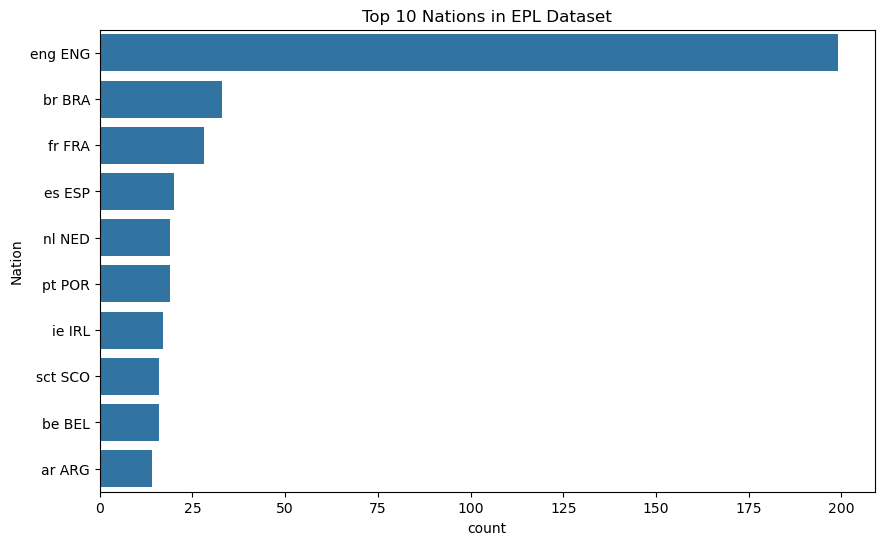

In [6]:

plt.figure(figsize=(10,6))
sns.countplot(y='Nation', data=df, order=df['Nation'].value_counts().head(10).index)
plt.title("Top 10 Nations in EPL Dataset")
plt.show()


## Q10. Players whose actual goals (Gls) significantly exceed or fall below expected goals (xG)

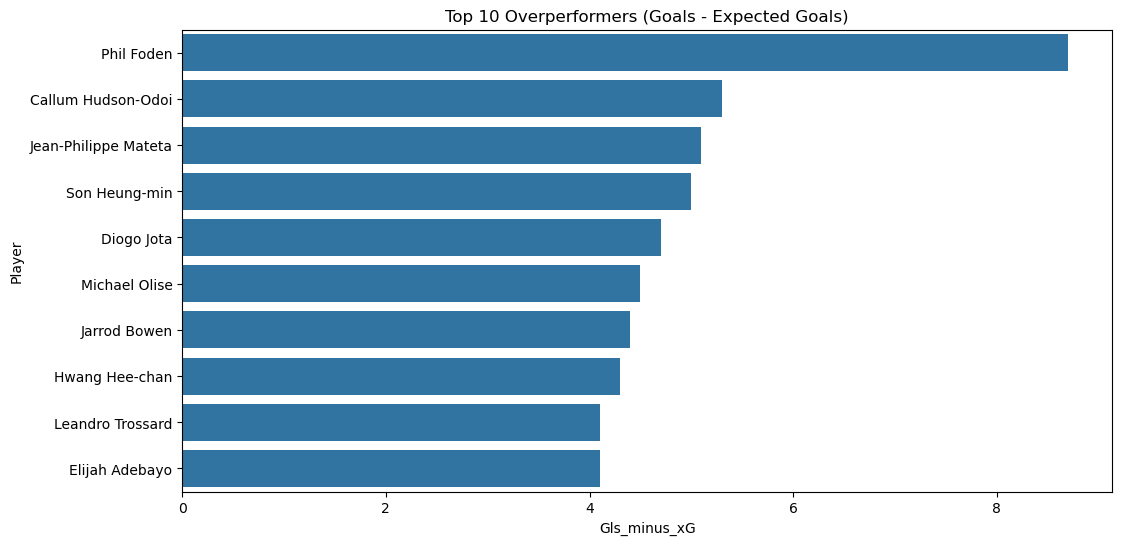

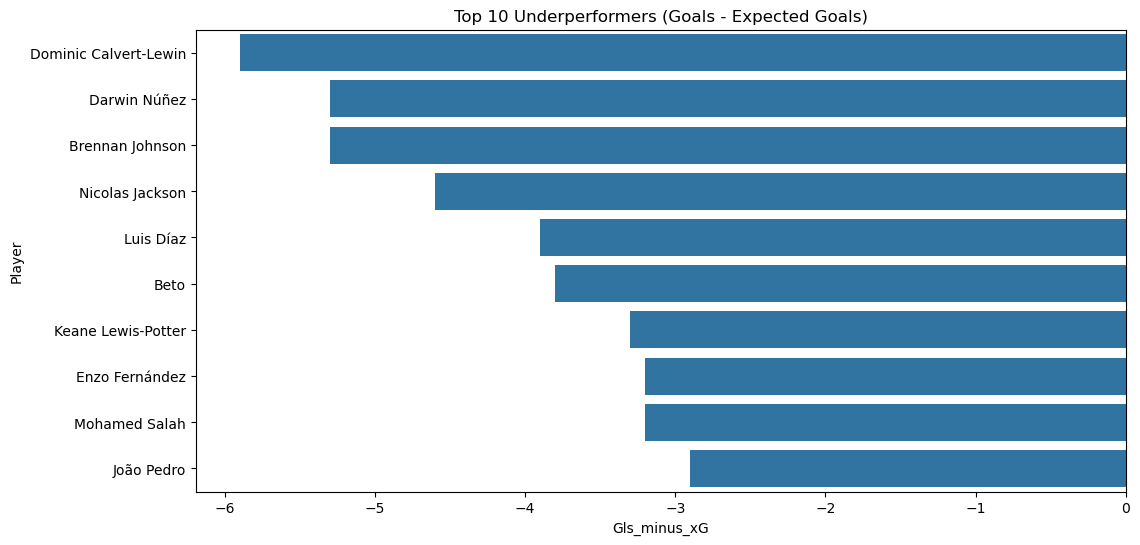

In [7]:

df['Gls_minus_xG'] = df['Gls'] - df['xG']

# Overperformers
plt.figure(figsize=(12,6))
sns.barplot(data=df.nlargest(10, 'Gls_minus_xG'), x='Gls_minus_xG', y='Player')
plt.title("Top 10 Overperformers (Goals - Expected Goals)")
plt.show()

# Underperformers
plt.figure(figsize=(12,6))
sns.barplot(data=df.nsmallest(10, 'Gls_minus_xG'), x='Gls_minus_xG', y='Player')
plt.title("Top 10 Underperformers (Goals - Expected Goals)")
plt.show()
